In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
%matplotlib inline

In [11]:
df = pd.read_csv(load_iris().filename, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,150.0,4.0,setosa,versicolor,virginica
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0


In [26]:
iris = load_iris()
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [40]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [36]:
iris_data = np.hstack((iris.data, iris.target.reshape(-1, 1)))
df = pd.DataFrame(iris_data, columns =['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


/tmp/ipykernel_73560/3521981824.py:14: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
/home/seeyou/anaconda3/envs/pytorch/lib/python3.8/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


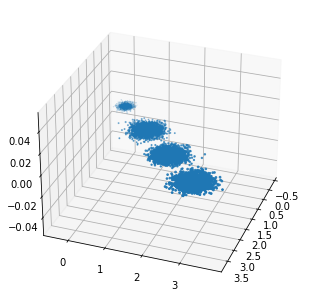

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# make_nlobs方法常被用来生成聚类算法的测试数据
# make_blobs会根据用户指定的特征数量，中心点数量，范围等来生成几类数据
from sklearn.datasets import make_blobs
# X为样本特征，Y为样本簇类型 共10000个样本，每个样本3个特征，共4个簇
# n_samples表示产生多少个数据  n_features表示数据是几维，
# centers表示中心点 cluster_std表示分布的标准差
X, y = make_blobs(n_samples=10000, n_features=3, centers=[[3, 3, 3], [0, 0, 0], [1, 1, 1],
                [2, 2, 2]], cluster_std=[0.2, 0.1, 0.2, 0.2], random_state=9)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(X[:, 0], X[:, 1], X[:, 2], marker='o')
plt.show()

In [3]:
# 我们先只对数据进行投影，看看投影后的三个维度的方差分布
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

[0.98318212 0.00850037 0.00831751]
[3.78521638 0.03272613 0.03202212]


可以看出投影后三个特征维度的方差比例大约为98.3%  0.8%  0.8% 。投影后第一个特征占了绝大多数的主成分比例

In [4]:
# 现在我们来进行降维，从三维降到二维
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

[0.98318212 0.00850037]
[3.78521638 0.03272613]


结果其实可以预料，因为上面三个投影后的特征维度的方差分别为：[3.78521638 0.03272613 0.03202212] ，投影到二维后选择的肯定是钱两个特征，而抛弃第三个特征。

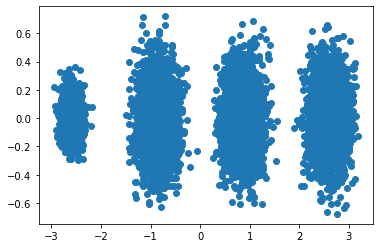

In [5]:
# 看看此时转化后的数据分布
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')
plt.show()

In [6]:
# 不直接指定降维的维度，而指定降维后的主成分方差和比例
pca = PCA(n_components=0.95)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)

[0.98318212]
[3.78521638]
1


可见只有第一个投影特征被保留，这也很好理解，我们的第一个主成分占投影特征的方差比例高达98%。只选择这一个特征维度便可以满足95%的阈值。我们现在选择阈值99%看看

In [7]:
pca = PCA(n_components = 0.99)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)

[0.98318212 0.00850037]
[3.78521638 0.03272613]
2


这个结果也很好理解，因为我们第一个主成分占了98.3%的方差比例，第二个主成分占了0.8%的方差比例，两者一起可以满足我们的阈值。

In [8]:
# 最后我们看看让 MLE 算法自己选择降维维度的效果，代码如下：
pca = PCA(n_components = 'mle')
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)

[0.98318212]
[3.78521638]
1


# IRIS 数据集实践 IPCA（Incremental  PCA）

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [11]:
data = datasets.load_iris()
X =data['data']
y =data['target']

/tmp/ipykernel_73560/3257969205.py:1: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(plt.figure())


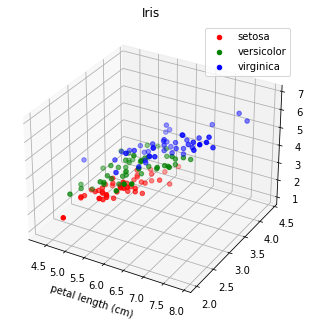

In [21]:
ax = Axes3D(plt.figure())

# 在X[y==i ,0], X[y==i, 1], X[y==i,2]中，通过0，1，2选择了三个特征
for c, i, target_name in zip('rgb', [0, 1, 2], data.target_names):
    ax.scatter(X[y==i, 0], X[y==i, 1], X[y==i, 2], c=c, label=target_name)

ax.set_xlabel(data.feature_names[0])
ax.set_xlabel(data.feature_names[1])
ax.set_xlabel(data.feature_names[2])
ax.set_title('Iris')
plt.legend()
plt.show()

/tmp/ipykernel_73560/915471137.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(plt.figure())


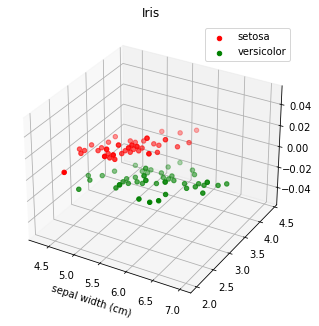

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets


data = datasets.load_iris()
X =data['data']
y =data['target']
ax = Axes3D(plt.figure())
for c, i, target_name in zip('rgb', [0, 1], data.target_names):
    ax.scatter(X[y==i, 0], X[y==i, 1], c=c, label=target_name)

ax.set_xlabel(data.feature_names[0])
ax.set_xlabel(data.feature_names[1])
ax.set_title('Iris')
plt.legend()
plt.show()